In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical


In [2]:
df_train = pd.read_csv('D:\Python\mlmed2025\data\mitbih_train.csv', header=None)
df_test  = pd.read_csv('D:\Python\mlmed2025\data\mitbih_test.csv', header=None)

In [3]:
print("Train dataset shape:", df_train.shape)
print("Missing values in train dataset:\n", df_train.isnull().sum())
print("Number of duplicate rows in train dataset:", df_train.duplicated().sum())

Train dataset shape: (87554, 188)
Missing values in train dataset:
 0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64
Number of duplicate rows in train dataset: 0


In [4]:
print("Test dataset shape:", df_test.shape)
print("Missing values in test dataset:\n", df_test.isnull().sum())
print("Number of duplicate rows in test dataset:", df_test.duplicated().sum())

Test dataset shape: (21892, 188)
Missing values in test dataset:
 0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64
Number of duplicate rows in test dataset: 0


In [5]:
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values.astype(int)
X_test  = df_test.iloc[:, :-1].values
y_test  = df_test.iloc[:, -1].values.astype(int)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

X_train = X_train[..., np.newaxis]
X_test  = X_test[..., np.newaxis]

num_classes = 5
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat  = to_categorical(y_test, num_classes=num_classes)

C:\Users\ndtun\AppData\Local\Temp\ipykernel_14588\3179317120.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_all, palette="muted")


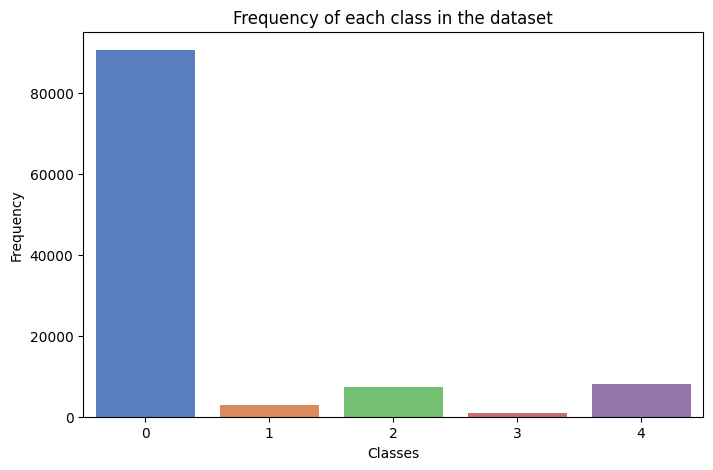

In [6]:
y_all = np.concatenate([y_train, y_test])

plt.figure(figsize=(8, 5))
sns.countplot(x=y_all, palette="muted")

plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Frequency of each class in the dataset")
plt.show()

In [6]:
model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

d:\Python\emotion_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 183, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 183, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 91, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 91, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 87, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 87, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 41, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 364,549 (1.39 MB)

 Trainable params: 364,101 (1.39 MB)

 Non-trainable params: 448 (1.75 KB)

In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

In [9]:
history = model.fit(
    X_train, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test_cat),
    callbacks=[early_stop, reduce_lr, checkpoint]
)

loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"MIT-BIH Test loss: {loss:.4f}, Test accuracy: {acc:.4f}")

Epoch 1/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9237 - loss: 0.2962
Epoch 1: val_accuracy improved from -inf to 0.97223, saving model to best_model.keras
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9237 - loss: 0.2961 - val_accuracy: 0.9722 - val_loss: 0.1090 - learning_rate: 0.0010
Epoch 2/20
1367/1369 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9676 - loss: 0.1132
Epoch 2: val_accuracy improved from 0.97223 to 0.97780, saving model to best_model.keras
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9676 - loss: 0.1132 - val_accuracy: 0.9778 - val_loss: 0.0855 - learning_rate: 0.0010
Epoch 3/20
1367/1369 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9737 - loss: 0.0945
Epoch 3: val_accuracy improved from 0.97780 to 0.97940, saving model to best_model.keras
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9737 - loss: 0.0945 - val_accuracy: 0.9794 - val_loss: 0.0747 - learning_rate: 0.0010
Epoch 4/20
1366/1369 ━━━━━━━━━━━━━

In [10]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


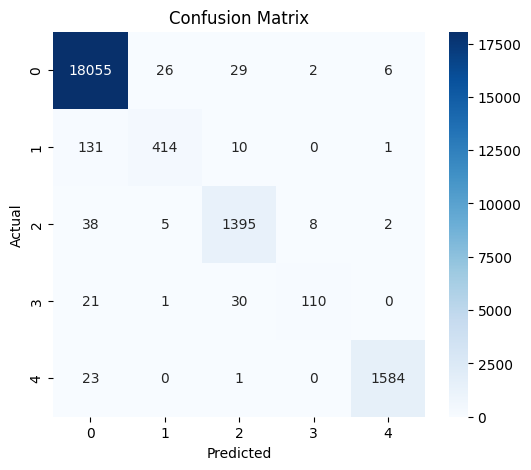

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18118
           1       0.93      0.74      0.83       556
           2       0.95      0.96      0.96      1448
           3       0.92      0.68      0.78       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.96      0.87      0.91     21892
weighted avg       0.98      0.98      0.98     21892



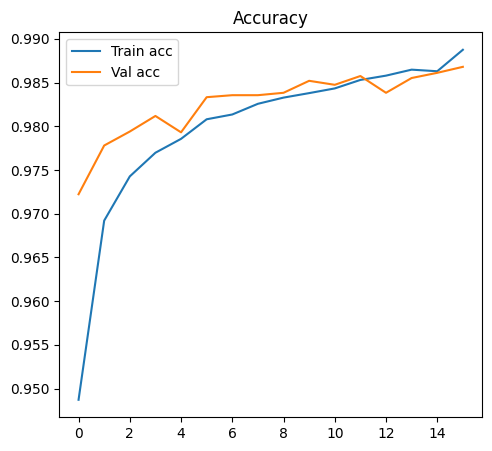

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

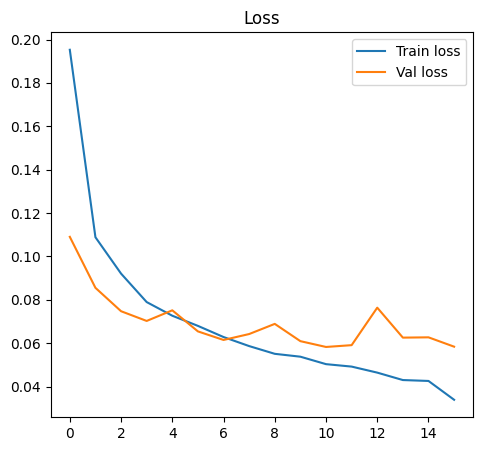

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Loss')
plt.legend()